# Plots for case study

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, colors, ticker
import matplotlib.dates as mdates
from scipy.interpolate import interp2d, RectBivariateSpline
from datetime import datetime, timedelta
import pandas as pd
import cftime
import seaborn as sns
import json
from matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap,Normalize
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import cmweather
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import glob
import os

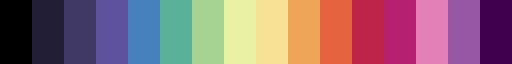

In [2]:
# Load colormap

# Read the colormap from a .txt file
def load_colormap_from_txt(file_path):
    # Load RGB values from the file
    rgb_values = np.loadtxt(file_path)
    return ListedColormap(rgb_values)

# Example usage
colormap_file = 'chase-spectral-rgb.txt'  # Replace with your .txt file path
radar_cmap = load_colormap_from_txt(colormap_file)

discrete_cmap = ListedColormap(radar_cmap(np.linspace(0, 1, 16)))
discrete_mask_cmap = discrete_cmap.copy()
discrete_mask_cmap.set_under(color='white') #set values below vmin to white
discrete_mask_cmap.set_bad(color='gray') #set missing (NaN) values to gray

discrete_mask_cmap

Define time period of case study

In [13]:
#Define time period
time1 = np.datetime64('2024-09-08T08:00')
time2 = np.datetime64('2024-09-08T14:00')

time_map1 = np.datetime64('2024-09-08T11:00')
time_map2 = np.datetime64('2024-09-08T12:00')

time_RHI = np.datetime64('2024-09-08T11:08')
#time_RHI = np.datetime64('2024-09-03T16:09')
az_RHI = 278.0
#az_RHI = 187.0
RHI_fname = '/huracan/tank4/cornell/ORCESTRA/sea-pol/qc_data/level4a/rhi/20240908/gridded_rhi_20240908_1108_278.0.nc'
#RHI_fname = '/huracan/tank4/cornell/ORCESTRA/sea-pol/qc_data/level4a/rhi/20240903/gridded_rhi_20240903_1609_187.0.nc'

QVP 1D data

In [5]:
# load data
qvp = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/sea-pol/qc_data/level4a/qvp_1D/qvp_1D.nc')

#Find indices for start and end times
index1qvp = np.abs(pd.to_datetime(qvp.time) - time1).argmin()
index2qvp = np.abs(pd.to_datetime(qvp.time) - time2).argmin()
qvp

<xarray.Dataset> Size: 11MB
Dimensions:       (time: 4983, Z: 181)
Coordinates:
  * time          (time) datetime64[ns] 40kB 2024-08-16T08:20:05.026000128 .....
  * Z             (Z) float32 724B 0.0 100.0 200.0 ... 1.78e+04 1.79e+04 1.8e+04
Data variables:
    rainrate_avg  (time, Z) float32 4MB ...
    dbz_avg       (time, Z) float32 4MB ...
    rainrate_int  (time, Z) float32 4MB ...
Attributes:
    title:        Average rain rate and reflectivity at each altitude from SE...
    description:  Spatial means of rainrate from SEA-POL 45 degree elevation ...
    source:       SEA-POL Level4a QVP Volume

RHI data

In [4]:
#Load data
rhi = xr.open_dataset(RHI_fname)

#Set missing data to NaN
rhi_DBZ = rhi.DBZ.where(rhi.DBZ != -9999, np.nan)

SEA-POL low-level reflectivity (replace later with composite reflectivity)

In [6]:
#Load data
seapol = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/sea-pol/qc_data/level4a/gridded_rainrate/PICCOLO_gridded_rainrate_all.nc')

#Find indices
index_map1 = np.abs(pd.to_datetime(seapol.time) - time_map1).argmin()
index_map2 = np.abs(pd.to_datetime(seapol.time) - time_map2).argmin()

map1 = seapol.DBZ[index_map1,:,:]
map2 = seapol.DBZ[index_map2,:,:]

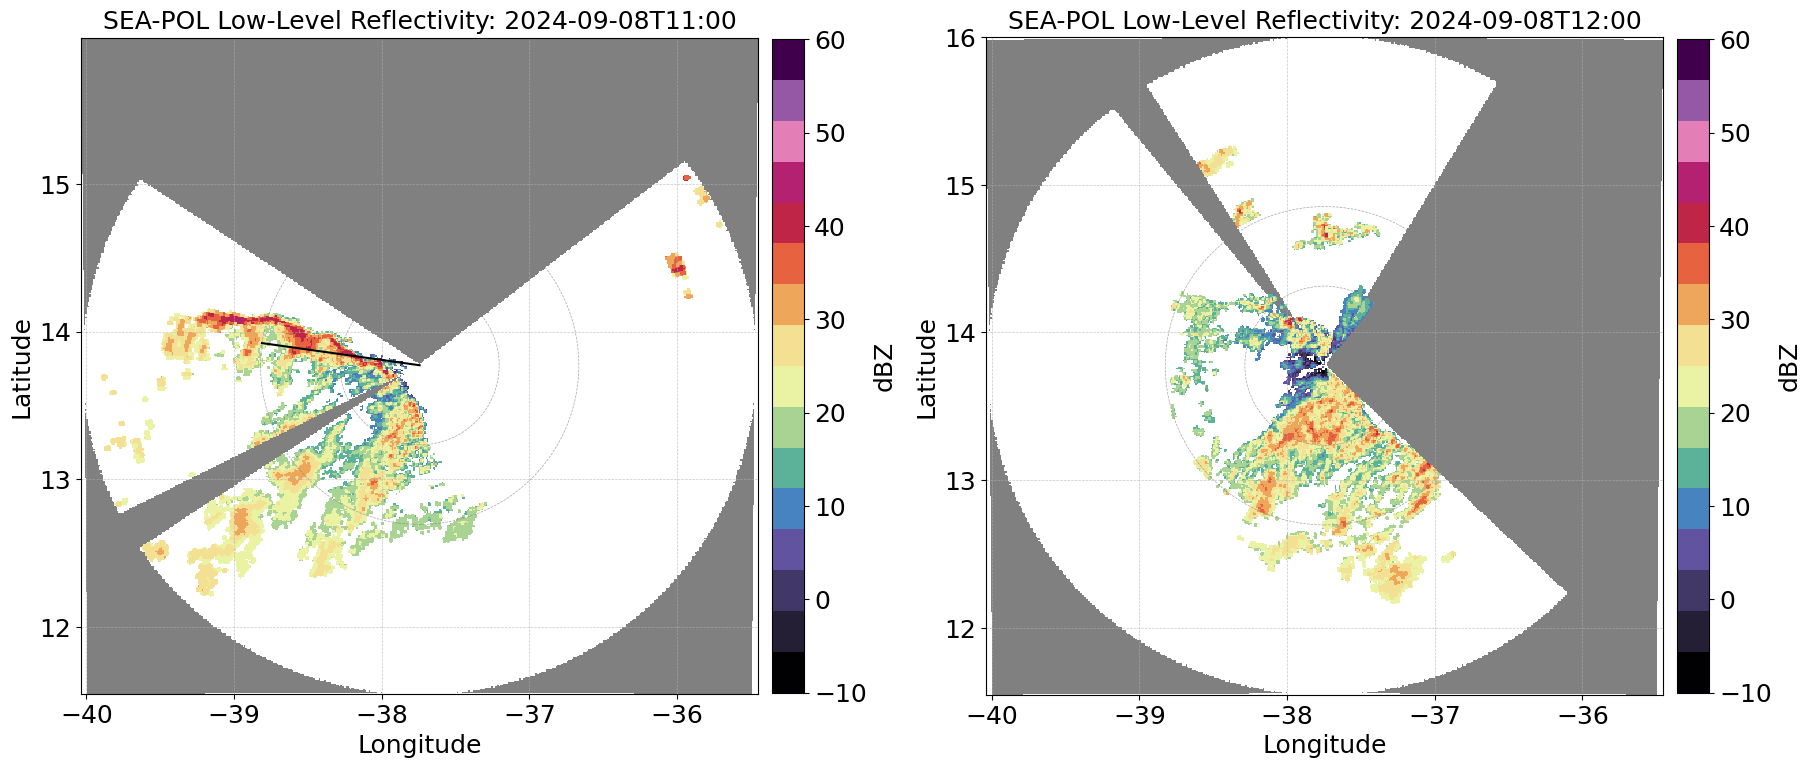

In [ ]:
# Make plot
fig, axs = plt.subplots(1,2, figsize=(18, 8),layout="constrained")  # 1 row, 2 column

cax = axs[0].pcolormesh(map1.longitude, map1.latitude, map1, cmap=discrete_mask_cmap, vmin=-10, vmax=60,shading='auto')
axs[0].set_aspect('equal',adjustable='box')
cbar = fig.colorbar(cax, ax=axs[0], orientation='vertical',pad=0.02, shrink=0.83)
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(np.linspace(-10,60,8))
cbar.ax.set_ylabel('dBZ', fontsize=18)

axs[0].set_title('SEA-POL Low-Level Reflectivity: ' + str(time_map1),fontsize=18)    
axs[0].set_ylabel('Latitude', fontsize=18)
axs[0].set_xlabel('Longitude',fontsize=18)
axs[0].set_xticks(np.linspace(-40,-36, 5))  # Adjust the number of ticks as needed
axs[0].set_yticks(np.linspace(12, 16, 5))  # Adjust the number of ticks as needed
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=18)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=18)

cax = axs[1].pcolormesh(map2.longitude, map2.latitude, map2, cmap=discrete_mask_cmap, vmin=-10, vmax=60,shading='auto')
axs[1].set_aspect('equal',adjustable='box')

cbar = fig.colorbar(cax, ax=axs[1], orientation='vertical',pad=0.02, shrink=0.83)
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(np.linspace(-10,60,8))
cbar.ax.set_ylabel('dBZ', fontsize=18)

axs[1].set_title('SEA-POL Low-Level Reflectivity: ' + str(time_map2),fontsize=18)    
axs[1].set_ylabel('Latitude', fontsize=18)
axs[1].set_xlabel('Longitude',fontsize=18)
axs[1].set_xticks(np.linspace(-40,-36, 5))  # Adjust the number of ticks as needed
axs[1].set_yticks(np.linspace(12, 16, 5))  # Adjust the number of ticks as needed
axs[1].set_xticklabels(axs[0].get_xticklabels(), fontsize=18)
axs[1].set_yticklabels(axs[0].get_yticklabels(), fontsize=18)

# Add grid lines to the first subplot
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add grid lines to the second subplot
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add 120 km circle
axs[0].add_patch(plt.Circle((map1.longitude[245,245], map1.latitude[245,245]), 120/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))
axs[1].add_patch(plt.Circle((map2.longitude[245,245], map2.latitude[245,245]), 120/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))

# Add 60 km circle
axs[0].add_patch(plt.Circle((map1.longitude[245,245], map1.latitude[245,245]), 60/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))
axs[1].add_patch(plt.Circle((map2.longitude[245,245], map2.latitude[245,245]), 60/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))

# Add azimuth line
# Radar center (latitude and longitude)
center_lat = map1.latitude[245, 245]  # Replace with the radar's latitude
center_lon = map1.longitude[245, 245]  # Replace with the radar's longitude

# Azimuth in degrees
azimuth = 278

# Define the radius of the line (e.g., 120 km)
radius_km = 120
radius_deg = radius_km / 111.32  # Convert km to degrees (approximation)

# Calculate the endpoint of the line
end_lat = center_lat + radius_deg * np.cos(np.radians(azimuth))
end_lon = center_lon + radius_deg * np.sin(np.radians(azimuth))

# Draw the line on the first subplot
axs[0].plot([center_lon, end_lon], [center_lat, end_lat], color='black', linestyle='-', linewidth=1.5)


SEA-POL average average low-level rain rate

In [7]:
#load data
rain = xr.open_dataset('../../data/SEA-POL_gridded_rainrate_spatial_means.nc')

#Find indices for start and end times
index1 = np.abs(pd.to_datetime(rain.time) - time1).argmin()
index2 = np.abs(pd.to_datetime(rain.time) - time2).argmin()

Disdrometer data

In [8]:
#load data
disdro = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/M203/Distrometer/QC/final/DSD_METEOR_merged.nc')

#Find indices for start and end times
index_start_disdro = np.where(pd.to_datetime(disdro.time) == time1)[0]
index_start_disdro = int(index_start_disdro[0])

index_end_disdro = np.where(pd.to_datetime(disdro.time) == time2)[0]
index_end_disdro = int(index_end_disdro[0])

# Smooth with a running mean, restrict to the time period of interest
disdro_p = disdro.rain_rate_qc[index_start_disdro:index_end_disdro+1].rolling(time=10, center=True).mean() # 10 minute running mean


# Make plot

/tmp/ipykernel_681740/2099143659.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=18)
/tmp/ipykernel_681740/2099143659.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=18)
/tmp/ipykernel_681740/2099143659.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=18)
/tmp/ipykernel_681740/2099143659.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=18)
/tmp/ipykernel_681740/2099143659.py:69: UserWarning: set_ticklabels() sh

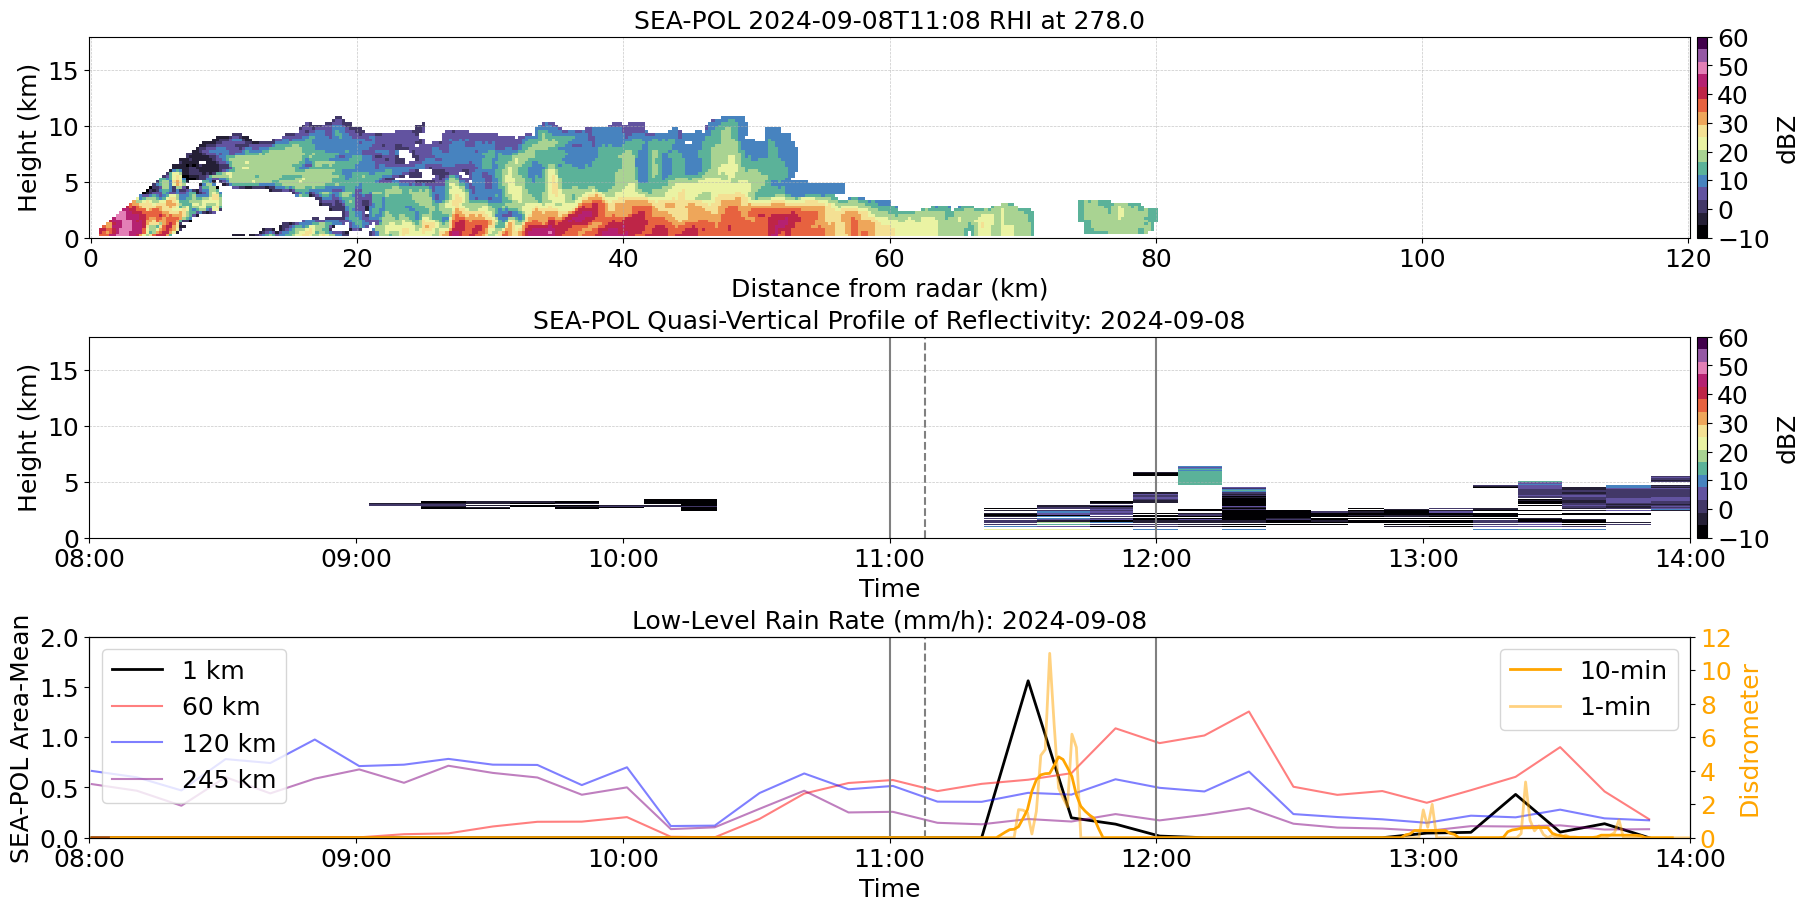

In [14]:
fig, axs = plt.subplots(3,1, figsize=(18, 9),layout="constrained")  # 3 rows, 1 column

#RHI
cax = axs[0].pcolormesh(rhi.R/1000, rhi.Z/1000, rhi_DBZ[0,:,:], cmap=discrete_cmap, vmin=-10, vmax=60,shading='auto')
cbar = fig.colorbar(cax, ax=axs[0], orientation='vertical',pad=-0.04)
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(np.linspace(-10,60,8))
cbar.ax.set_ylabel('dBZ', fontsize=18)

axs[0].set_ylim(0,18)
axs[0].set_title('SEA-POL '+str(time_RHI)+' RHI at '+str(az_RHI),fontsize=18)   
axs[0].set_ylabel('Height (km)', fontsize=18)
axs[0].set_xlabel('Distance from radar (km)',fontsize=18)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=18)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=18)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


#QVP reflective time-height plot
#fig,ax = plt.subplots(figsize=(18,3))
cax = axs[1].pcolormesh(qvp.time[index1qvp:index2qvp+1], qvp.Z/1000, qvp.dbz_avg[index1qvp:index2qvp+1,:].transpose(), cmap=discrete_cmap, vmin=-10, vmax=60,shading='auto')
cbar = fig.colorbar(cax, ax=axs[1], orientation='vertical',pad=-0.04)
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(np.linspace(-10,60,8))
cbar.ax.set_ylabel('dBZ', fontsize=18)

#vertical lines at specific times
axs[1].axvline(x=pd.to_datetime('2024-09-08T11:00:00'), color='gray', linestyle='-')
axs[1].axvline(x=pd.to_datetime('2024-09-08T11:08:00'), color='gray', linestyle='--')
axs[1].axvline(x=pd.to_datetime('2024-09-08T12:00:00'), color='gray', linestyle='-')

axs[1].set_xlim(pd.to_datetime('2024-09-08T08:00:00'), pd.to_datetime('2024-09-08T14:00:00'))
axs[1].set_ylim(0, 18)

axs[1].set_title('SEA-POL Quasi-Vertical Profile of Reflectivity: 2024-09-08',fontsize=18)   
axs[1].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[1].xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs[0].xaxis.get_major_locator()))
axs[1].set_ylabel('Height (km)', fontsize=18)
axs[1].set_xlabel('Time',fontsize=18)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=18)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=18)
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

#Mean rain rate time series
#fig,ax = plt.subplots(figsize=(14,3),layout="constrained")
axs[2].plot(rain.time[index1:index2], rain.rain1_mean[index1:index2].values, color='black', label='1 km',linewidth=2)
axs[2].plot(rain.time[index1:index2], rain.rain60_mean[index1:index2].values, color='red', alpha=0.5, label='60 km')
axs[2].plot(rain.time[index1:index2], rain.rain120_mean[index1:index2].values, color='blue', alpha=0.5, label='120 km')
axs[2].plot(rain.time[index1:index2], rain.rain245_mean[index1:index2].values, color='purple', alpha=0.5, label='245 km')

#vertical lines at specific times
axs[2].axvline(x=pd.to_datetime(time_map1), color='gray', linestyle='-')
axs[2].axvline(x=pd.to_datetime(time_RHI), color='gray', linestyle='--')
axs[2].axvline(x=pd.to_datetime(time_map2), color='gray', linestyle='-')

axs[2].set_xlim(pd.to_datetime(time1), pd.to_datetime(time2))

axs[2].set_title('Low-Level Rain Rate (mm/h): 2024-09-08',fontsize=18)
axs[2].set_ylabel('SEA-POL Area-Mean', fontsize=18)
#axs[2].set_xlabel(f"Time (Start: {rain.time[index1].values})",fontsize=18)
axs[2].set_xlabel('Time',fontsize=18)
axs[2].set_ylim(0, 2)

axs[2].legend(loc='upper left', fontsize=18)

axs[2].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[2].xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs[1].xaxis.get_major_locator()))

axs[2].set_xticklabels(axs[2].get_xticklabels(), fontsize=18)
axs[2].set_yticklabels(axs[2].get_yticklabels(), fontsize=18)

ax2 = axs[2].twinx()
ax2.plot(disdro.time[index_start_disdro:index_end_disdro+1], disdro_p.values, color='orange', linewidth=2,label='10-min')
ax2.plot(disdro.time[index_start_disdro:index_end_disdro+1], disdro.rain_rate_qc[index_start_disdro:index_end_disdro+1].values, color='orange', alpha=0.5, linewidth=2,label='1-min')
ax2.set_ylim(0,12)
ax2.set_ylabel('Disdrometer',color='orange',fontsize=18)
ax2.tick_params(axis='y',labelcolor='orange')
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=18)
ax2.legend(loc='upper right', fontsize=18)
